In [15]:
import numpy as np
pi = np.pi
from qutip import *

from qutip.qip.circuit import QubitCircuit, Gate
from qutip.qip.operations import gate_sequence_product, rx
from qutip.qip.device import *
from qutip.qip import pulse

#print(qutip.qip.device.__file__)

#import qip.ethprocessor as qip
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# One qubit test

## Quantum Circuit

In [16]:
# Number of qubits in the system
N = 1

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
#qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
#qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")

qc.png

### ETH Processor

In [17]:
from qip.ethprocessor import ETHProcessor

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = 1, resonance_freq = omega, anharmonicity = alpha, correct_global_phase=False)

eth.load_circuit(qc);

swag


### Plot pulses

(<Figure size 1800x900 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9f48baa580>)

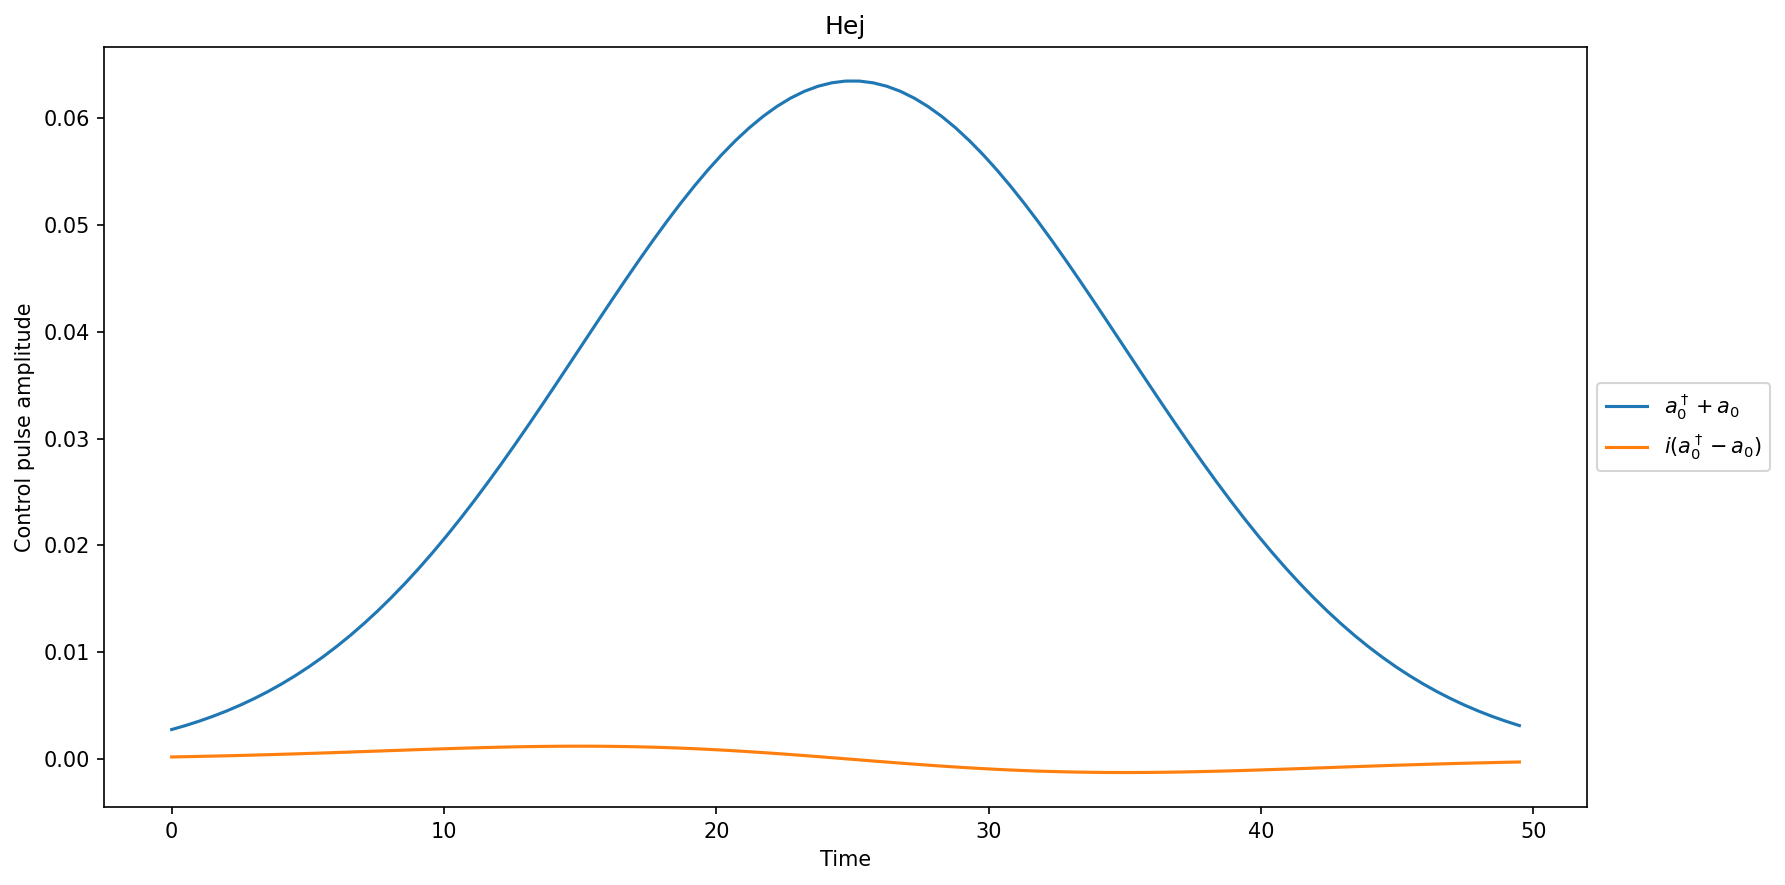

In [18]:
eth.plot_pulses(title='Hej', dpi=150)

## Execute quantum circuit

In [20]:
result = eth.run_state(init_state = basis(3,0), qc = qc, analytical=True)

wasd [Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.         1.         0.        ]
 [1.         0.         1.41421356]
 [0.         1.41421356 0.        ]], Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = True
Qobj data =
[[0.+0.j         0.-1.j         0.+0.j        ]
 [0.+1.j         0.+0.j         0.-1.41421356j]
 [0.+0.j         0.+1.41421356j 0.+0.j        ]]]


In [26]:
result[-1]

Quantum object: dims = [[3], [3]], shape = (3, 3), type = oper, isherm = False
Qobj data =
[[ 9.99998364e-01+0.00000000e+00j  1.38437800e-04-1.80333449e-03j
  -2.28597596e-06-3.53058800e-07j]
 [-1.38437800e-04-1.80333449e-03j  9.99995093e-01+0.00000000e+00j
   1.95780614e-04-2.55030010e-03j]
 [-2.28597596e-06+3.53058800e-07j -1.95780614e-04-2.55030010e-03j
   9.99996729e-01+0.00000000e+00j]]

# Two qubit test

## Quantum Circuit

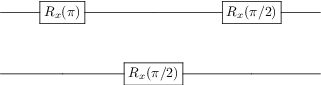

In [22]:
# Number of qubits in the system
N = 2

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi/2, r"\pi/2")
qc.add_gate("RX", 0, None, np.pi/2, r"\pi/2")
qc.png

In [23]:
qc.depth()

2

In [24]:
qc.layers()

[[Gate(RX, targets=[0], controls=None), Gate(RX, targets=[1], controls=None)],
 [Gate(RX, targets=[0], controls=None)]]

### ETH Processor

In [ ]:
from qip.ethprocessor import ETHProcessor
import numpy as np

pi = np.pi

# Resonance frequency in GHz
omega = 5.708390 * 2*pi

# Self-Kerr coefficient (anharmonicity) in GHz
alpha = -0.275172227 * 2*pi

eth = ETHProcessor(N = 2, resonance_freq = omega, anharmonicity = alpha)

eth.load_circuit(qc);

### Plot pulses

(<Figure size 1800x900 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7faf58c4bc40>)

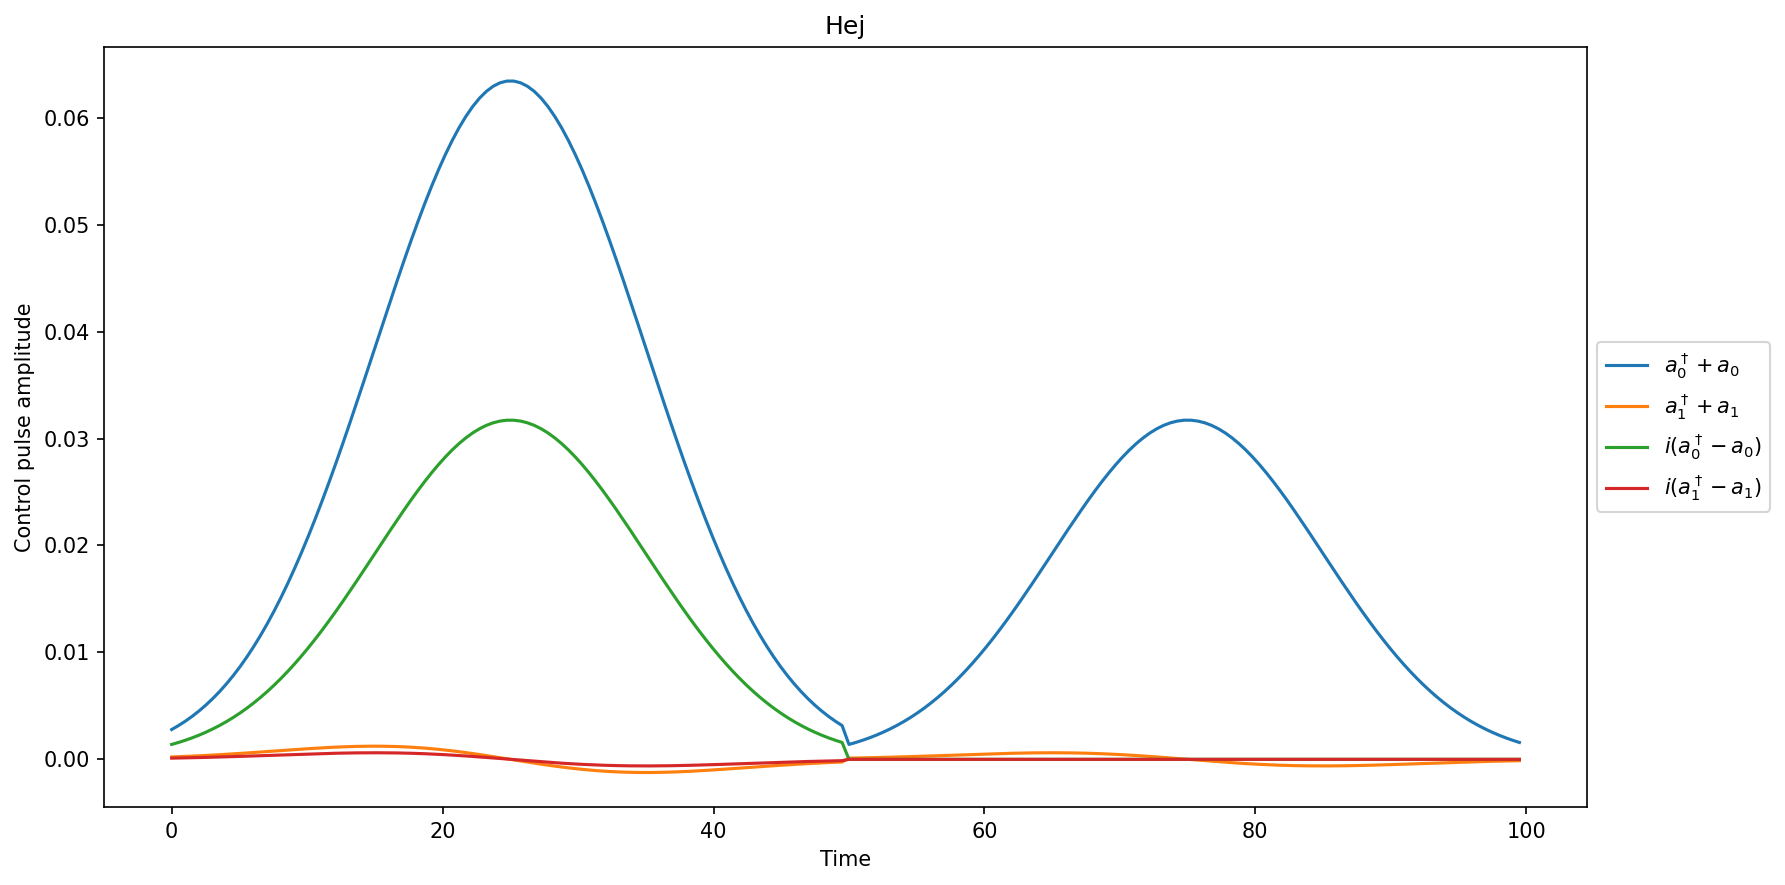

In [25]:
eth.plot_pulses(title='Hej', dpi=150)

In [8]:
# Number of qubits in the system
N = 3

# Input state
input_states = ["0"]*N

# A list of integers for the dimension of each composite system.
dims = [3]*N

# Representation of a quantum program/algorithm, maintaining a sequence of gates.
qc = QubitCircuit(N = N, input_states = input_states, dims = dims, reverse_states = False)

qc.add_gate("RX", 0, None, np.pi, r"\pi")
qc.add_gate("RX", 1, None, np.pi/2, r"\pi/2")
qc.add_gate("RX", 2, None, np.pi/3, r"\pi/3")
qc.add_gate("CNOT", controls=[2], targets=[1])
#qc.add_gate("CNOT", controls=[2], targets=[0])
qc.add_gate("RX", 0, None, np.pi/3, r"\pi/3")
qc.depth 

<bound method QubitCircuit.depth of <qutip.qip.circuit.QubitCircuit object at 0x7faf689ef550>>

## Gate shit

In [9]:
num_ops = 4
coeff_list = [[] for i in range(num_ops)]
I = list(range(3))
Q = list(range(4,8))

In [10]:
coeff_list[0].append(I)
coeff_list[1].append(Q)

In [11]:
print(coeff_list)

[[[0, 1, 2]], [[4, 5, 6, 7]], [], []]


In [12]:
num_ops = 4
layer = 0
targets = [0,1]

coeff_len = 0
for i in range(num_ops):
    try:
        if len(coeff_list[i][layer]) > coeff_len:
            coeff_len = len(coeff_list[i][layer])
    except:
        0
print(coeff_len)
print(coeff_list)

for i in range(num_ops):
    try:
        if len(coeff_list[i][layer]) < coeff_len:
            coeff_list[i][layer].extend([0] * (coeff_len-len(coeff_list[i][layer])))
    except:
        coeff_list[i].append([0] * coeff_len)
            

4
[[[0, 1, 2]], [[4, 5, 6, 7]], [], []]


In [13]:
# Join sublists
for i in range(num_ops):
    coeff_list[i] = np.array(sum(coeff_list[i], []))

In [14]:
coeff_list

[array([0, 1, 2, 0]),
 array([4, 5, 6, 7]),
 array([0, 0, 0, 0]),
 array([0, 0, 0, 0])]

In [15]:
np.shape(coeff_list)

(4, 4)